# Linear Regression - Mini-Project 1


***Edit this cell with your name(s), tutorial number(s) and ID(s)***

---

Name: Ahmed ELshihy

ID: 52-3022 

Tutorial: T01

---

Name: Karim wady 

ID: 52-2874

Tutorial: T01

---

Name:

ID:

Tutorial:

---


## Dataset Description

The dataset contains historical car auction sales prices, scraped from the outside internet sources and collected in 2015.

Each row represents a sale at a used car auction. Each column is described below.

| Column       | Description                                                                                          |
| ------------ | ---------------------------------------------------------------------------------------------------- |
| year         | Car's year of production                                                                             |
| make         | Car make/brand                                                                                       |
| model        | Car model                                                                                            |
| trim         | Car's trim or grade, which specifies a car model's level of performance, features, options or extras |
| body         | Car body type (e.g. Sedan, SUV, Coupe, etc.)                                                         |
| transmission | Car transmission type. The mechanism that moves the power from the engine to the wheels.             |
| vin          | Vehicle Identification Number, a unique code to identify individual motor vehicles.                  |
| state        | The state in which the car was auctioned.                                                            |
| condition    | The condition of the cars being at the time of auction, 5 being the best score and 1 being the worst.|
| odometer     | The distance traveled by a vehicle since being manufactured, in miles                                |
| color        | Exterior color of the car                                                                            |
| interior     | Interior color of the car                                                                            |
| seller       | The seller of the car or car dealer                                                                  |
| mmr          | Manheim\* Market Report, the market estimated price of the cars. An indicator of wholesale prices.   |
| sellingprice | The price a car was sold at in auction.                                                              |
| saledate     | The date on which the car has been sold.                                                             |

\*Manheim is a company established in 1945 as a car auction company. It has grown to a very reputable company in the industry and its MMR estimate is a baseline tool for wholesale car price determination. They base their price calculations on over 10 million transaction over the past 13-month period.


## Importing Libraries \& Dataset


In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use("seaborn")

try:
    df = pd.read_csv('car_prices.csv')
except:
    df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2023/main/data/car_prices.csv')

df.head()

/var/folders/sj/ppw5_y297zxdxx3rld00mjfh0000gn/T/ipykernel_83607/2207690546.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2013,Hyundai,Sonata,GLS,sedan,automatic,5npeb4acxdh702805,ma,3.9,50404.0mi,black,gray,the hertz corporation,$11000,$10900,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Toyota,4Runner,SR5,SUV,automatic,jtezu5jr2e5064567,fl,4.9,17846.0mi,gray,—,award auto sales and leasing inc,$28700,$29900,Wed Feb 18 2015 07:15:00 GMT-0800 (PST)
2,2012,Lexus,IS 250,Base,Sedan,automatic,jthbf5c24c5168599,fl,4.1,21122.0mi,silver,black,lexus financial services,$22200,$24200,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
3,2002,BMW,X5,4.4i,SUV,automatic,5uxfb33562lh33864,fl,1.9,145303.0mi,black,black,peddle llc,$3675,$3200,Wed Mar 04 2015 07:10:00 GMT-0800 (PST)
4,2014,Ford,E-Series Van,E-250,E-Series Van,automatic,1ftne2ew0eda31832,wa,4.9,6714.0mi,white,gray,u-haul,$22500,$22100,Wed Feb 18 2015 06:45:00 GMT-0800 (PST)


## Data Inspection

Perform data inspection tasks here (recommended for data understanding).

In [98]:
#checkin data types
df.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46578 entries, 0 to 46577
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          46578 non-null  int64  
 1   make          46578 non-null  object 
 2   model         46578 non-null  object 
 3   trim          46578 non-null  object 
 4   body          46578 non-null  object 
 5   transmission  46578 non-null  object 
 6   vin           46578 non-null  object 
 7   state         46578 non-null  object 
 8   condition     46578 non-null  float64
 9   odometer      46578 non-null  object 
 10  color         46578 non-null  object 
 11  interior      46578 non-null  object 
 12  seller        46578 non-null  object 
 13  mmr           46578 non-null  object 
 14  sellingprice  46578 non-null  object 
 15  saledate      46578 non-null  object 
dtypes: float64(1), int64(1), object(14)
memory usage: 5.7+ MB


In [99]:
df.describe()

,year,condition
count,46578.000000,46578.000000
mean,2010.203401,3.424265
std,3.831316,0.944009
min,1990.000000,1.000000
25%,2008.000000,2.700000
50%,2012.000000,3.600000
75%,2013.000000,4.200000
max,2015.000000,5.000000


In [100]:
df.shape

(46578, 16)

In [101]:
df.isnull().sum()

year            0
make            0
model           0
trim            0
body            0
transmission    0
vin             0
state           0
condition       0
odometer        0
color           0
interior        0
seller          0
mmr             0
sellingprice    0
saledate        0
dtype: int64

In [102]:
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2013,Hyundai,Sonata,GLS,sedan,automatic,5npeb4acxdh702805,ma,3.9,50404.0mi,black,gray,the hertz corporation,$11000,$10900,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Toyota,4Runner,SR5,SUV,automatic,jtezu5jr2e5064567,fl,4.9,17846.0mi,gray,—,award auto sales and leasing inc,$28700,$29900,Wed Feb 18 2015 07:15:00 GMT-0800 (PST)
2,2012,Lexus,IS 250,Base,Sedan,automatic,jthbf5c24c5168599,fl,4.1,21122.0mi,silver,black,lexus financial services,$22200,$24200,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
3,2002,BMW,X5,4.4i,SUV,automatic,5uxfb33562lh33864,fl,1.9,145303.0mi,black,black,peddle llc,$3675,$3200,Wed Mar 04 2015 07:10:00 GMT-0800 (PST)
4,2014,Ford,E-Series Van,E-250,E-Series Van,automatic,1ftne2ew0eda31832,wa,4.9,6714.0mi,white,gray,u-haul,$22500,$22100,Wed Feb 18 2015 06:45:00 GMT-0800 (PST)


In [103]:
df.tail()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
46573,2013,Ford,Edge,SE,SUV,automatic,2fmdk4gc2dbc03247,va,3.5,52844.0mi,—,gray,wheels exchange llc,$15650,$17000,Wed Jan 07 2015 09:30:00 GMT-0800 (PST)
46574,2012,Infiniti,G Sedan,G37 Journey,g sedan,automatic,jn1cv6ap9cm623162,ca,4.5,23185.0mi,black,black,nissan infiniti lt,$19350,$21500,Thu Jun 18 2015 05:30:00 GMT-0700 (PDT)
46575,2013,BMW,3 Series,328i,Sedan,automatic,wba3a5c56df356614,tx,4.2,45357.0mi,white,beige,motorcars of south texas,$22200,$22000,Wed Feb 18 2015 02:00:00 GMT-0800 (PST)
46576,2013,Toyota,Camry,LE,Sedan,automatic,4t1bf1fk8du254684,ca,3.5,43376.0mi,black,beige,avis rac/san leandro,$13400,$13800,Wed Jan 14 2015 04:30:00 GMT-0800 (PST)
46577,2013,Kia,Rio,LX,Sedan,automatic,knadm4a32d6164825,ga,4.1,49953.0mi,silver,black,kia motors finance,$9700,$9300,Thu Dec 18 2014 10:00:00 GMT-0800 (PST)


## Data Pre-Processing & Cleaning

_Apply any data preprocessing and/or feature engineering below. Show/output the changes to the dataset._

In [104]:
#odometer=object ,float
df['odometer'] = df['odometer'].astype(str)

df['odometer'] = df['odometer'].str.extract(r'(\d+)')

df['odometer'] = df['odometer'].astype(int)

df.rename(columns={'odometer': 'odometer(mi)'}, inplace=True)

In [105]:
#mmr=object, int
df['mmr'] = df['mmr'].astype(str)

df['mmr'] = df['mmr'].str.extract(r'(\d+)')

df['mmr'] = df['mmr'].astype(int)

df.rename(columns={'mmr': 'mmr($)'}, inplace=True)

In [106]:
#sellingprice= object, int
df['sellingprice'] = df['sellingprice'].astype(str)

df['sellingprice'] = df['sellingprice'].str.extract(r'(\d+)')

df['sellingprice'] = df['sellingprice'].astype(int)

df.rename(columns={'sellingprice': 'sellingprice($)'}, inplace=True)

In [107]:
#make transmission automatic = 1 and manual = 0 
# Define a mapping of old values to new values
value_mapping = {'automatic': '1', 'manual': '0'}

# Use the .replace() method to rename specific attributes
df['transmission'] = df['transmission'].replace(value_mapping)

df['transmission'] = df['transmission'].astype(int)

In [108]:
df.dtypes

year                 int64
make                object
model               object
trim                object
body                object
transmission         int64
vin                 object
state               object
condition          float64
odometer(mi)         int64
color               object
interior            object
seller              object
mmr($)               int64
sellingprice($)      int64
saledate            object
dtype: object

In [109]:
df['color'] = df['color'].astype(str)
df['interior'] = df['interior'].astype(str)

In [110]:
# - in color column 
df.value_counts('color').sort_values(ascending=False).head()

df['color'] = df['color'].replace('—', 'black')

In [111]:
df.value_counts('interior').sort_values(ascending=False).head()

df['interior'] = df['interior'].replace('—', 'black')

In [112]:
df['body']

0               sedan
1                 SUV
2               Sedan
3                 SUV
4        E-Series Van
             ...     
46573             SUV
46574         g sedan
46575           Sedan
46576           Sedan
46577           Sedan
Name: body, Length: 46578, dtype: object

In [113]:
df['body'] = df['body'].astype(str)
df['body'] = df['body'].str.lower()
df['body'].unique()

array(['sedan', 'suv', 'e-series van', 'crew cab', 'g sedan', 'wagon',
       'regular cab', 'double cab', 'coupe', 'minivan', 'supercrew',
       'convertible', 'extended cab', 'hatchback', 'van', 'supercab',
       'king cab', 'g convertible', 'quad cab', 'beetle convertible',
       'g coupe', 'crewmax cab', 'club cab', 'access cab',
       'genesis coupe', 'g37 convertible', 'cab plus 4',
       'promaster cargo van', 'mega cab', 'koup', 'elantra coupe',
       'q60 convertible', 'regular-cab', 'xtracab', 'cts coupe',
       'cts wagon', 'granturismo convertible', 'tsx sport wagon',
       'cts-v coupe', 'q60 coupe', 'transit van'], dtype=object)

In [114]:
# Mapping dictionary to group 'body' categories into main types
body_mapping = {
   
    
    'sedan': 'Sedan',
    'suv': 'SUV',
    'e-series van': 'Minivan',
    'crew cab': 'Pickup Truck',
    'g sedan': 'Sedan',
    'wagon': 'Wagon',
    'regular cab': 'Pickup Truck',
    'double cab': 'Pickup Truck',
    'coupe': 'Coupe',
    'minivan': 'Minivan',
    'supercrew': 'Pickup Truck',
    'convertible': 'Convertible',
    'extended cab': 'Pickup Truck',
    'hatchback': 'Hatchback',
    'van': 'Minivan',
    'supercab': 'Pickup Truck',
    'king cab': 'Pickup Truck',
    'g convertible': 'Convertible',
    'quad cab': 'Pickup Truck',
    'beetle convertible': 'Convertible',
    'g coupe': 'Coupe',
    'crewmax cab': 'Pickup Truck',
    'club cab': 'Pickup Truck',
    'access cab': 'Pickup Truck',
    'genesis coupe': 'Coupe',
    'g37 convertible': 'Convertible',
    'cab plus 4': 'Pickup Truck',
    'promaster cargo van': 'Minivan',
    'mega cab': 'Pickup Truck',
    'koup': 'Coupe',
    'elantra coupe': 'Coupe',
    'q60 convertible': 'Convertible',
    'regular-cab': 'Pickup Truck',
    'xtracab': 'Pickup Truck',
    'cts coupe': 'Coupe',
    'cts wagon': 'Wagon',
    'granturismo convertible': 'Convertible',
    'tsx sport wagon': 'Wagon',
    'cts-v coupe': 'Coupe',
    'q60 coupe': 'Coupe',
    'transit van': 'Minivan'
}


# Apply the mapping to the 'body' column
df['body'] = df['body'].map(body_mapping)

In [115]:
df['body'].unique()

array(['Sedan', 'SUV', 'Minivan', 'Pickup Truck', 'Wagon', 'Coupe',
       'Convertible', 'Hatchback'], dtype=object)

In [116]:
import datetime

current_year = datetime.datetime.now().year

df['car_age'] = current_year - df['year']

df.head()

#this increases correlation significantly 

,year,make,model,trim,body,transmission,vin,state,condition,odometer(mi),color,interior,seller,mmr($),sellingprice($),saledate,car_age
0,2013,Hyundai,Sonata,GLS,Sedan,1,5npeb4acxdh702805,ma,3.9,50404,black,gray,the hertz corporation,11000,10900,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT),10
1,2014,Toyota,4Runner,SR5,SUV,1,jtezu5jr2e5064567,fl,4.9,17846,gray,black,award auto sales and leasing inc,28700,29900,Wed Feb 18 2015 07:15:00 GMT-0800 (PST),9
2,2012,Lexus,IS 250,Base,Sedan,1,jthbf5c24c5168599,fl,4.1,21122,silver,black,lexus financial services,22200,24200,Tue Jan 20 2015 01:30:00 GMT-0800 (PST),11
3,2002,BMW,X5,4.4i,SUV,1,5uxfb33562lh33864,fl,1.9,145303,black,black,peddle llc,3675,3200,Wed Mar 04 2015 07:10:00 GMT-0800 (PST),21
4,2014,Ford,E-Series Van,E-250,Minivan,1,1ftne2ew0eda31832,wa,4.9,6714,white,gray,u-haul,22500,22100,Wed Feb 18 2015 06:45:00 GMT-0800 (PST),9


## Exploratory Data Analysis


**Q0 (example): What is the most popular car exterior color?**


**Visualization**

<Axes: xlabel='color', ylabel='count'>

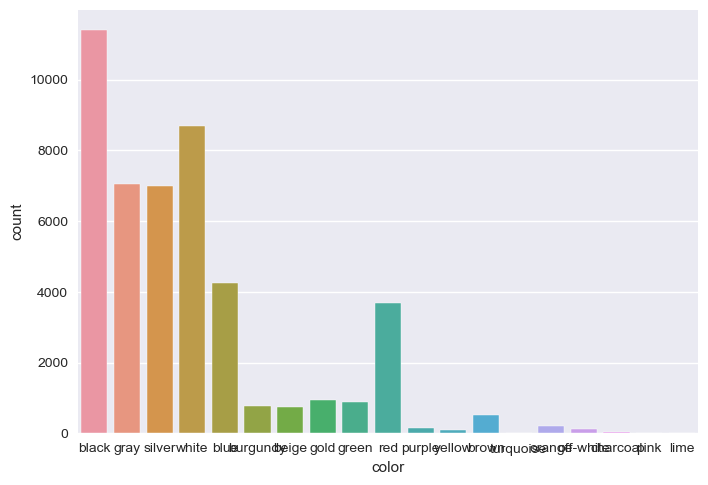

In [117]:
# Basic, minimal plot example
sns.countplot(x='color', data=df)

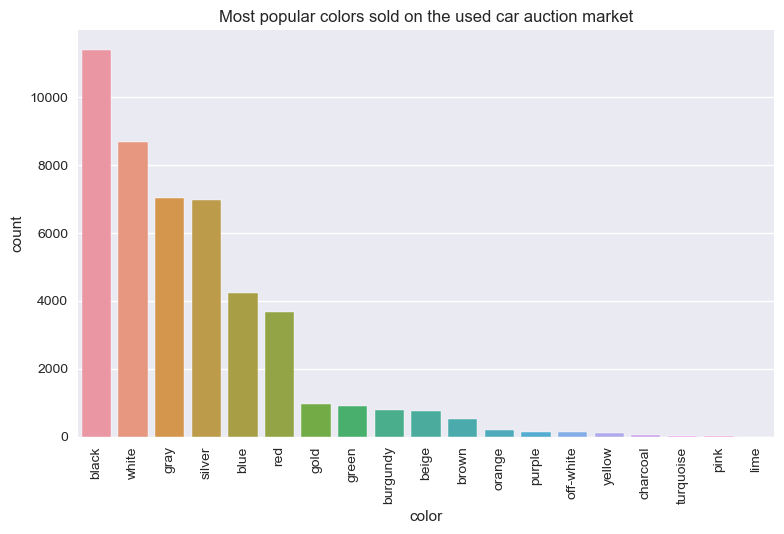

In [118]:
# Much better plot, with sorting in descending order, rotated x-axis labels for clarity, and a plot title
# Your visualizations should be neatly presented like the example below.
large_to_small = df.groupby('color').size().sort_values(ascending=False)
sns.countplot(x='color', data=df, order=large_to_small.index).set(title='Most popular colors sold on the used car auction market')
plt.xticks(rotation=90)
plt.tight_layout()

**Example note:** _you need to answer using a visualization (above) and a written/text answer (below)._

**Answer for Q0**: Black is the most popular exterior color of used cars sold in auctions, followed very closely by white.

**Q1: What are the most popular car brands? (mention at least 3)**
 

**Visualization**

In [119]:
df.value_counts('make').sort_values(ascending=False).head()

make
Ford         7871
Chevrolet    5322
Nissan       4297
Toyota       3474
Dodge        2718
Name: count, dtype: int64

**Answer for Q1**: 
1. Ford
2. Chevrolet 
3. Nissan 

**Q2: Draw a bar plot showing the selling price of each of the transmission categories. Do automatic cars, on
average (mean), sell for a higher price than manual cars?**

(Use the following link for reference:
https://seaborn.pydata.org/generated/seaborn.barplot.html)


**Visualization**

Text(0.5, 1.0, 'Bar Plot')

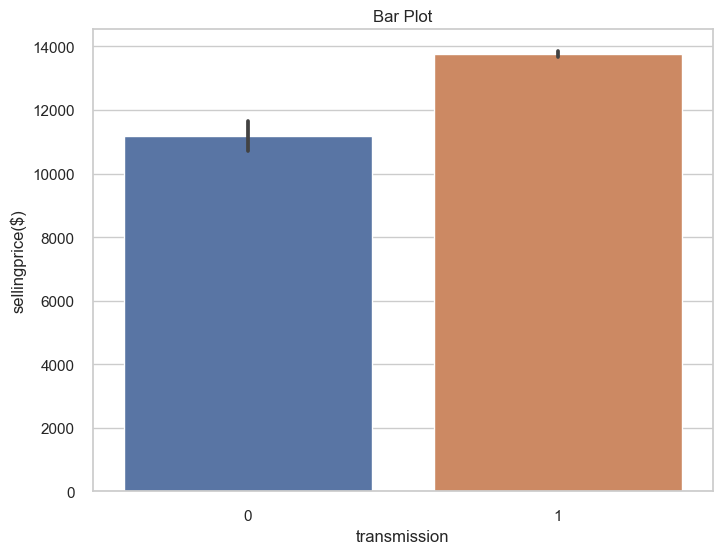

In [120]:
sns.set(style="whitegrid")  # Optional: Set a style for the plot
plt.figure(figsize=(8, 6))  # Optional: Set the figure size

sns.barplot(x="transmission", y="sellingprice($)", data=df)

plt.xlabel("transmission")
plt.ylabel("sellingprice($)")
plt.title("Bar Plot")

#plt.show() automatic = 1, manual = 0

**Answer for Q2**: As seen in the plot automatic cars sell for more than manual cars 

**Q3: Draw a box plot showing the distribution of the selling prices of each car make. Which car makes have the widest distribution of selling price (name two)? Which are the most expensive (name two)?**


**Visualization**

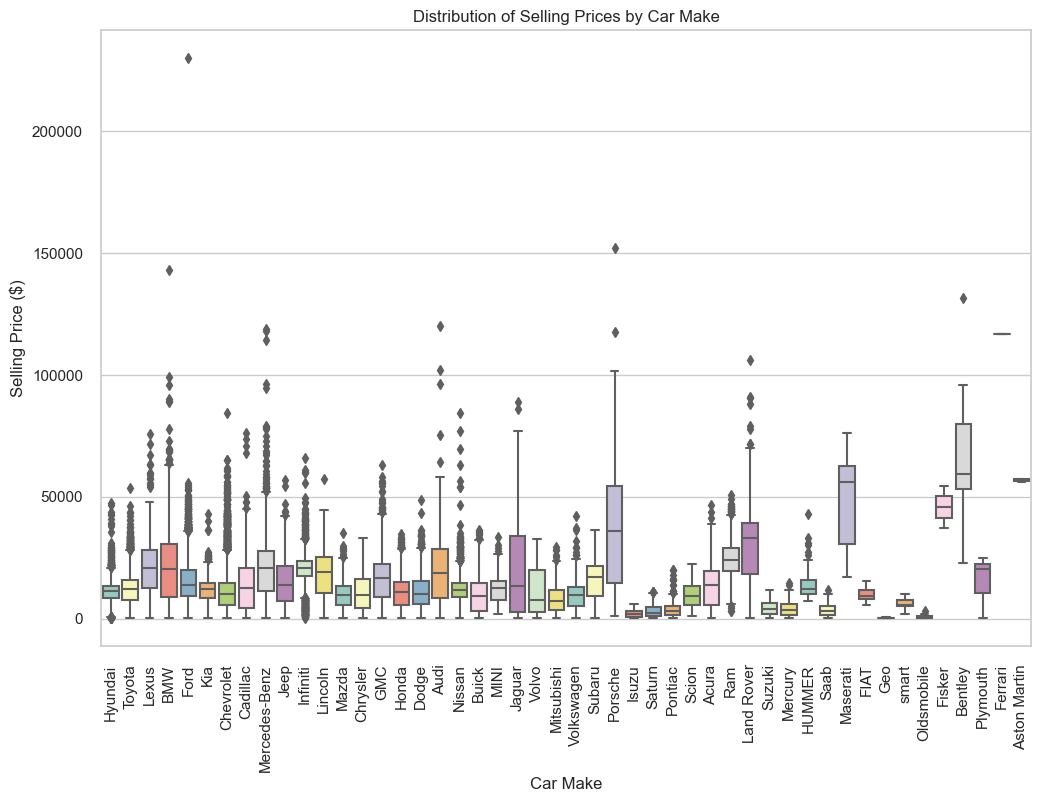

Car makes with the widest distribution of selling price:
         count          mean           std     min      25%      50%      75%  \
make                                                                            
Porsche  129.0  37257.751938  26717.778089  1250.0  14700.0  36000.0  54500.0   

              max      iqr  
make                        
Porsche  152000.0  39800.0  

Most expensive car makes:
         count      mean  std       min       25%       50%       75%  \
make                                                                    
Ferrari    1.0  117000.0  NaN  117000.0  117000.0  117000.0  117000.0   

              max  iqr  
make                    
Ferrari  117000.0  0.0  
---------------------------------------------------------
Car makes with the widest distribution of selling price:
                  mean      iqr
make                           
Porsche   37257.751938  39800.0
Maserati  48450.000000  31875.0

Most expensive car makes:
              mean  

In [121]:
plt.figure(figsize=(12, 8))  # Optional: Set the figure size

# Create a box plot to visualize the distribution of selling prices by car make
sns.boxplot(x="make", y="sellingprice($)", data=df, palette="Set3")

plt.xlabel("Car Make")
plt.ylabel("Selling Price ($)")
plt.title("Distribution of Selling Prices by Car Make")

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

plt.show()

# Calculate statistics for each car make
make_stats = df.groupby("make")["sellingprice($)"].describe()

# Calculate the IQR manually and identify the car makes with the widest distribution
make_stats["iqr"] = make_stats["75%"] - make_stats["25%"]
widest_distribution = make_stats[make_stats["iqr"] == make_stats["iqr"].max()]

# Identify the most expensive car makes (highest median)
most_expensive = make_stats[make_stats["50%"] == make_stats["50%"].max()]

# Print the results
print("Car makes with the widest distribution of selling price:")
print(widest_distribution)

print("\nMost expensive car makes:")
print(most_expensive)

print("---------------------------------------------------------")

widest_distribution = make_stats.nlargest(2, "iqr")

# Identify the most expensive car makes (top 2)
most_expensive = make_stats.nlargest(2, "50%")

# Print the results
print("Car makes with the widest distribution of selling price:")
print(widest_distribution[["mean", "iqr"]])

print("\nMost expensive car makes:")
print(most_expensive[["mean", "50%"]])

In [122]:
df['sellingprice($)'].sort_values(ascending=False)

18134    230000
35140    152000
31657    143000
25541    131500
3484     120000
          ...  
3880        200
11324       200
39551       200
15447       175
5905        150
Name: sellingprice($), Length: 46578, dtype: int64

In [123]:
df[df['sellingprice($)'] == 230000] #how?outlier?

,year,make,model,trim,body,transmission,vin,state,condition,odometer(mi),color,interior,seller,mmr($),sellingprice($),saledate,car_age
18134,2014,Ford,Escape,Titanium,SUV,1,1fmcu9j98eua23833,mo,4.3,27802,green,tan,ford-lincoln dealer program,22800,230000,Wed Feb 25 2015 02:00:00 GMT-0800 (PST),9


**Answer for Q3**: <br>
Car makes with the widest distribution of selling price:Porshe, Maserati <br>
Most expensive car makes:Ferrari, Bentley

**Q4: How correlated is the odometer reading or mileage with the car's sale price? (Hint: plot a line of best fit.)**

**Visualization**

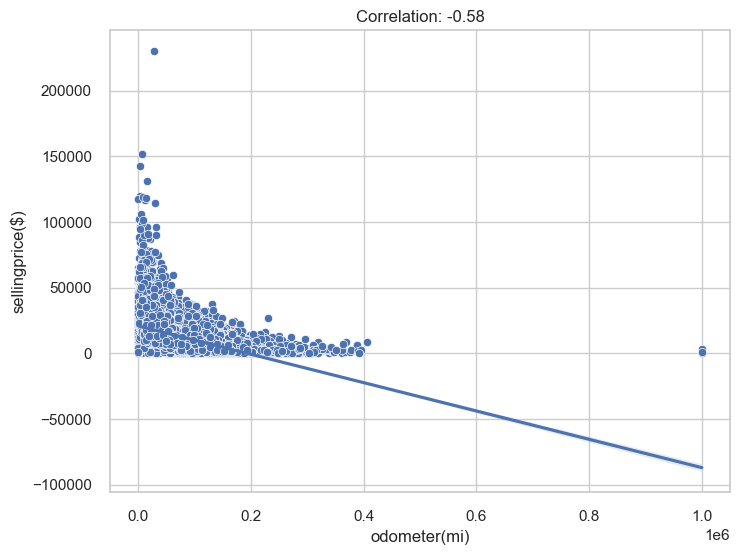

In [124]:
correlation = df['odometer(mi)'].corr(df['sellingprice($)'])

plt.figure(figsize=(8, 6))
sns.scatterplot(x='odometer(mi)', y='sellingprice($)', data=df)
plt.xlabel('Mileage')
plt.ylabel('sellingprice($)')
plt.title(f'Correlation: {correlation:.2f}')

sns.regplot(x='odometer(mi)', y='sellingprice($)', data=df, scatter=False)

plt.show()

**Answer for Q4**: A correlation coefficient of -0.58 indicates a moderately strong negative linear relationship. this implies an inverse relationship between mileage and selling price.

**Q5: Likewise, how correlated is the car's condition with its sale price? (Hint: plot a line of best fit.)**

**Visualization**

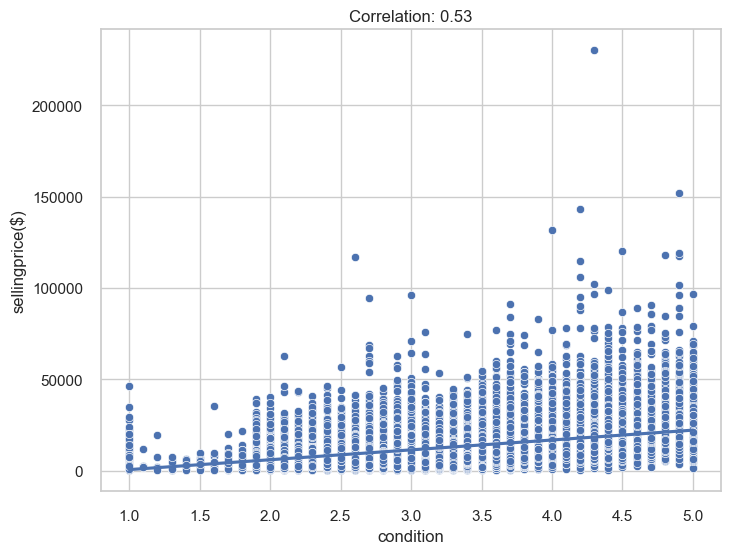

In [125]:
correlation = df['condition'].corr(df['sellingprice($)'])

plt.figure(figsize=(8, 6))
sns.scatterplot(x='condition', y='sellingprice($)', data=df)
plt.xlabel('condition')
plt.ylabel('sellingprice($)')
plt.title(f'Correlation: {correlation:.2f}')

sns.regplot(x='condition', y='sellingprice($)', data=df, scatter=False)

plt.show()

**Answer for Q5**: A correlation coefficient of 0.53 indicates a moderately positive linear relationship. This suggests that as the "condition" of cars improves (moves from lower condition ratings to higher ones), there is a tendency for the "sellingprice($)" to also increase.

**Q6: Draw a bar plot showing the selling price of each of the body categories. Are there differences in the average
(mean of) car price due to the car’s body type? If so, rank their order and state the most expensive and least
expensive car body type.**

**Visualization**

In [126]:
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer(mi),color,interior,seller,mmr($),sellingprice($),saledate,car_age
0,2013,Hyundai,Sonata,GLS,Sedan,1,5npeb4acxdh702805,ma,3.9,50404,black,gray,the hertz corporation,11000,10900,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT),10
1,2014,Toyota,4Runner,SR5,SUV,1,jtezu5jr2e5064567,fl,4.9,17846,gray,black,award auto sales and leasing inc,28700,29900,Wed Feb 18 2015 07:15:00 GMT-0800 (PST),9
2,2012,Lexus,IS 250,Base,Sedan,1,jthbf5c24c5168599,fl,4.1,21122,silver,black,lexus financial services,22200,24200,Tue Jan 20 2015 01:30:00 GMT-0800 (PST),11
3,2002,BMW,X5,4.4i,SUV,1,5uxfb33562lh33864,fl,1.9,145303,black,black,peddle llc,3675,3200,Wed Mar 04 2015 07:10:00 GMT-0800 (PST),21
4,2014,Ford,E-Series Van,E-250,Minivan,1,1ftne2ew0eda31832,wa,4.9,6714,white,gray,u-haul,22500,22100,Wed Feb 18 2015 06:45:00 GMT-0800 (PST),9


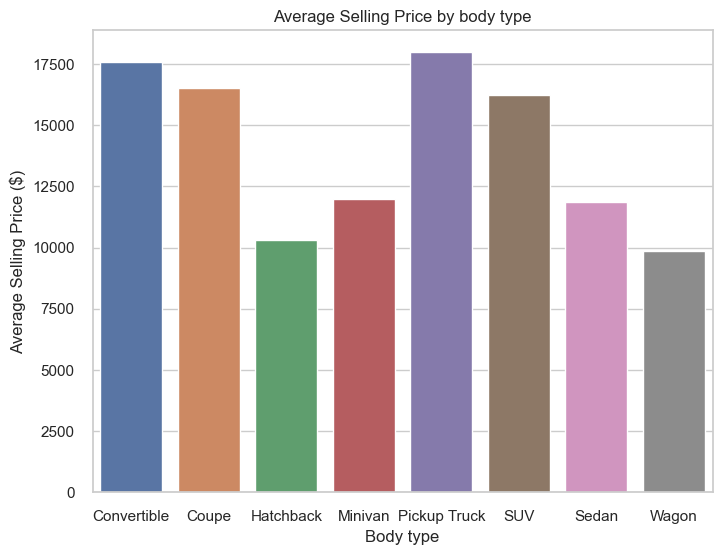

Rankings of Body Types by Average Selling Price:
           body  sellingprice($)  rank
4  Pickup Truck     17981.766407   1.0
0   Convertible     17581.563278   2.0
1         Coupe     16538.921097   3.0
5           SUV     16221.941270   4.0
3       Minivan     11981.053571   5.0
6         Sedan     11861.795912   6.0
2     Hatchback     10320.636123   7.0
7         Wagon      9872.678720   8.0
Most Expensive Body Type:
body               Pickup Truck
sellingprice($)    17981.766407
rank                        1.0
Name: 4, dtype: object

Least Expensive Body Type:
body                    Wagon
sellingprice($)    9872.67872
rank                      8.0
Name: 7, dtype: object


In [127]:
# Calculate the average selling price for each body type category
average_prices = df.groupby('body')['sellingprice($)'].mean().reset_index()

# Rank the body types by average selling price
average_prices['rank'] = average_prices['sellingprice($)'].rank(ascending=False)

plt.figure(figsize=(8, 6))

sns.barplot(x="body", y="sellingprice($)", data=average_prices)
    
plt.xlabel("Body type")
plt.ylabel("Average Selling Price ($)")
plt.title("Average Selling Price by body type")

plt.show()


# Print the results
print("Rankings of Body Types by Average Selling Price:")
print(average_prices[['body', 'sellingprice($)', 'rank']].sort_values('rank',ascending=True))

print("Most Expensive Body Type:")
print(average_prices[['body', 'sellingprice($)', 'rank']].sort_values('rank',ascending=True).iloc[0])

print("\nLeast Expensive Body Type:")
print(average_prices[['body', 'sellingprice($)', 'rank']].sort_values('rank',ascending=True).iloc[-1])

**Answer for Q6**: 
1. Pickup Truck
2. Convertible
3. Coupe
4. SUV
5. Minivan
6. Sedan
7. Hatchback
8. Wagon <br>
Most expensive: Pickup Truck <br>
Least expensive: Wagon

## Data Preparation for Modelling

_Apply any additional data preparation steps needed before modelling below. Show/output the changes to the dataset._

In [128]:
#feature selection and encoding
#first feature selection: drop unwanted columns 

columnsToDrop = ['vin','state','seller','mmr($)','saledate','year']

df = df.drop(columns = columnsToDrop)

df.head()

#these columns were dropped as it was clear they would have little or no impact on our dependent variable

,make,model,trim,body,transmission,condition,odometer(mi),color,interior,sellingprice($),car_age
0,Hyundai,Sonata,GLS,Sedan,1,3.9,50404,black,gray,10900,10
1,Toyota,4Runner,SR5,SUV,1,4.9,17846,gray,black,29900,9
2,Lexus,IS 250,Base,Sedan,1,4.1,21122,silver,black,24200,11
3,BMW,X5,4.4i,SUV,1,1.9,145303,black,black,3200,21
4,Ford,E-Series Van,E-250,Minivan,1,4.9,6714,white,gray,22100,9


In [158]:
#hot encode
#df_encoded = pd.get_dummies(df, columns=['year'])
#df_encoded = pd.get_dummies(df, columns=['make'])
#df_encoded = pd.get_dummies(df, columns=['body'])
#df_encoded = pd.get_dummies(df, columns=['odometer(mi)'])
#df_encoded = pd.get_dummies(df, columns=['color'])
#df_encoded = pd.get_dummies(df, columns=['condition'])

#categorical_columns = ['trim', 'body','transmission']
#df_encoded = pd.get_dummies(df, columns=categorical_columns, prefix=categorical_columns, drop_first=True)

In [178]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()

# label encode 'year' feature
year_le = LabelEncoder()
df_encoded['car_age'] = year_le.fit_transform(df['car_age'])

# label encode 'make' feature
make_le = LabelEncoder()
df_encoded['make'] = make_le.fit_transform(df['make'])

# label encode 'model' feature
make_le = LabelEncoder()
df_encoded['model'] = make_le.fit_transform(df['model'])

# label encode 'body' feature
body_le = LabelEncoder()
df_encoded['body'] = body_le.fit_transform(df['body'])

# label encode 'trim' feature
trim_le = LabelEncoder()
df_encoded['trim'] = trim_le.fit_transform(df['trim'])

# label encode 'condition' feature
condition_le = LabelEncoder()
df_encoded['condition'] = condition_le.fit_transform(df['condition'])

# label encode 'odometer(mi)' feature
odometer_le = LabelEncoder()
df_encoded['odometer(mi)'] = odometer_le.fit_transform(df['odometer(mi)'])

# label encode 'color' feature
color_le = LabelEncoder()
df_encoded['color'] = color_le.fit_transform(df['color'])

# label encode 'interior' feature
interior_le = LabelEncoder()
df_encoded['interior'] = interior_le.fit_transform(df['interior'])


# alternatively, if inverse transform is not needed:
#df[] = df[cols].apply(LabelEncoder().fit_transform)

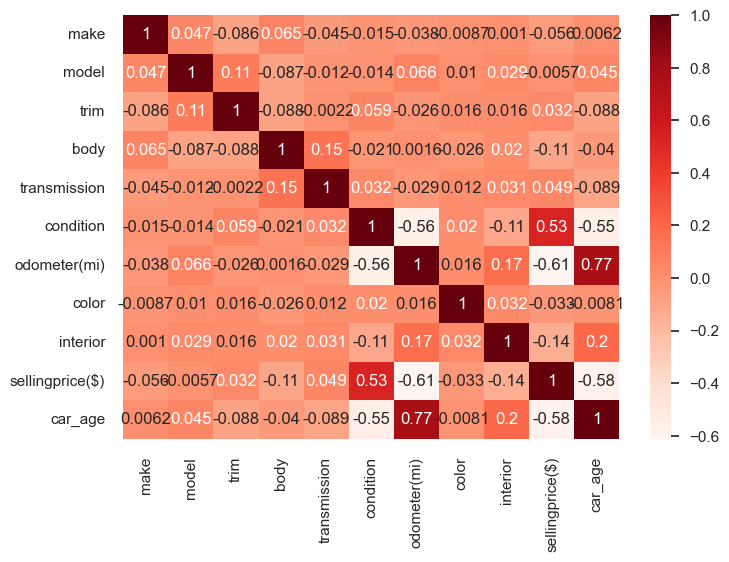

In [179]:
sns.heatmap(df_encoded.corr(), annot=True, cmap='Reds');

In [180]:
#after looking at heatmap: it is clear that there is high correlation between 
#year&condition, year&price, condition&price

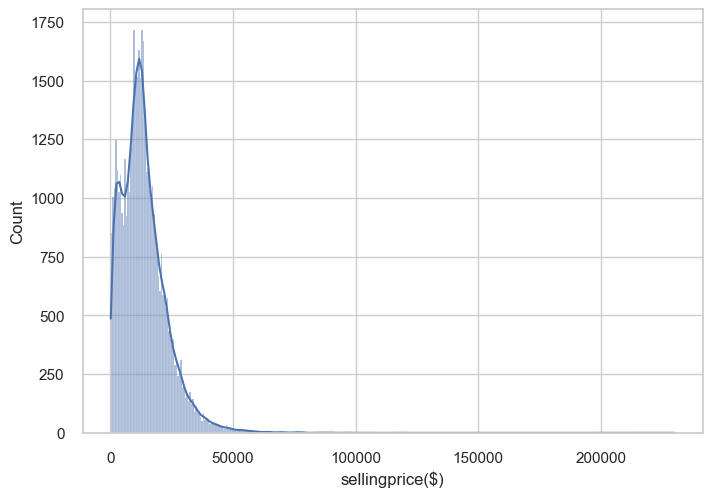

In [181]:
sns.histplot(df['sellingprice($)'], kde=True);

In [182]:
df.head(10)

,make,model,trim,body,transmission,condition,odometer(mi),color,interior,sellingprice($),car_age
0,Hyundai,Sonata,GLS,Sedan,1,3.9,50404,black,gray,10900,10
1,Toyota,4Runner,SR5,SUV,1,4.9,17846,gray,black,29900,9
2,Lexus,IS 250,Base,Sedan,1,4.1,21122,silver,black,24200,11
3,BMW,X5,4.4i,SUV,1,1.9,145303,black,black,3200,21
4,Ford,E-Series Van,E-250,Minivan,1,4.9,6714,white,gray,22100,9
5,Kia,Optima,LX,Sedan,1,4.6,8386,black,gray,15500,9
6,Chevrolet,Avalanche,LS,Pickup Truck,1,3.6,100676,gray,black,13600,16
7,Cadillac,CTS,Base,Sedan,1,4.6,87860,white,beige,14700,15
8,Mercedes-Benz,E-Class,E350,Sedan,1,1.7,27819,gray,black,20000,12
9,Kia,Forte,LX,Sedan,1,4.9,4046,blue,gray,13600,9


## Modelling

_Apply the linear regression model below._

In [183]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = df_encoded.drop('sellingprice($)',axis=1)
y = df_encoded['sellingprice($)']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=23)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train);

## Model Evaluation

_Evaluate the model you applied._

In [184]:
#model evaluation 
lin_reg.score(X_test, y_test)

0.470857798868935

In [157]:
#Model Validation
y_pred = lin_reg.predict(X_test)

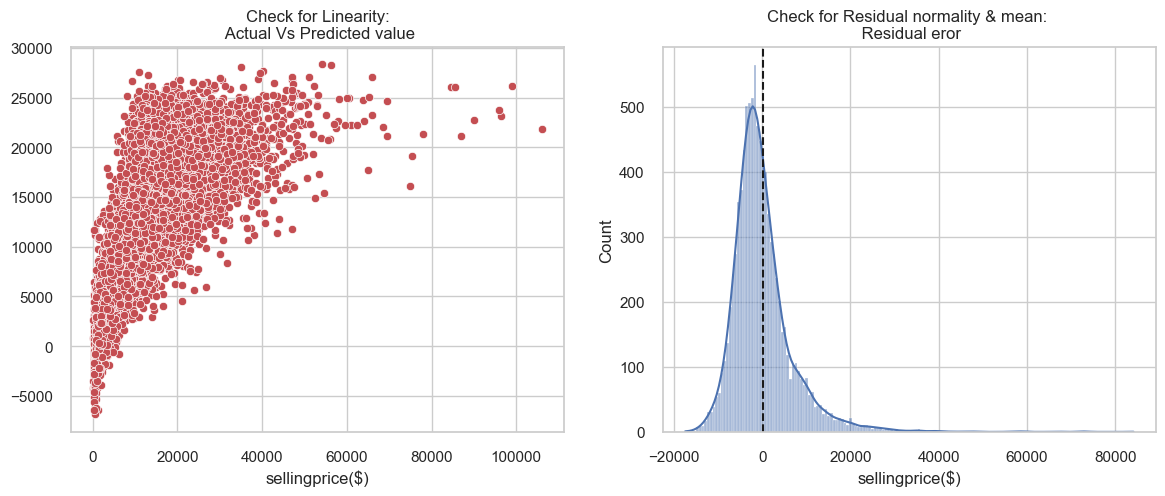

In [140]:
# Checking for linearity
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.scatterplot(x=y_test, y=y_pred, ax=ax, color='r')
ax.set_title('Check for Linearity:\n Actual Vs Predicted value')

# Checking for residual normality & mean
ax = f.add_subplot(122)
sns.histplot(x=(y_test - y_pred), ax=ax, color='b', kde=True)
ax.axvline((y_test - y_pred).mean(), color='k', linestyle='--')
ax.set_title('Check for Residual normality & mean: \n Residual eror');

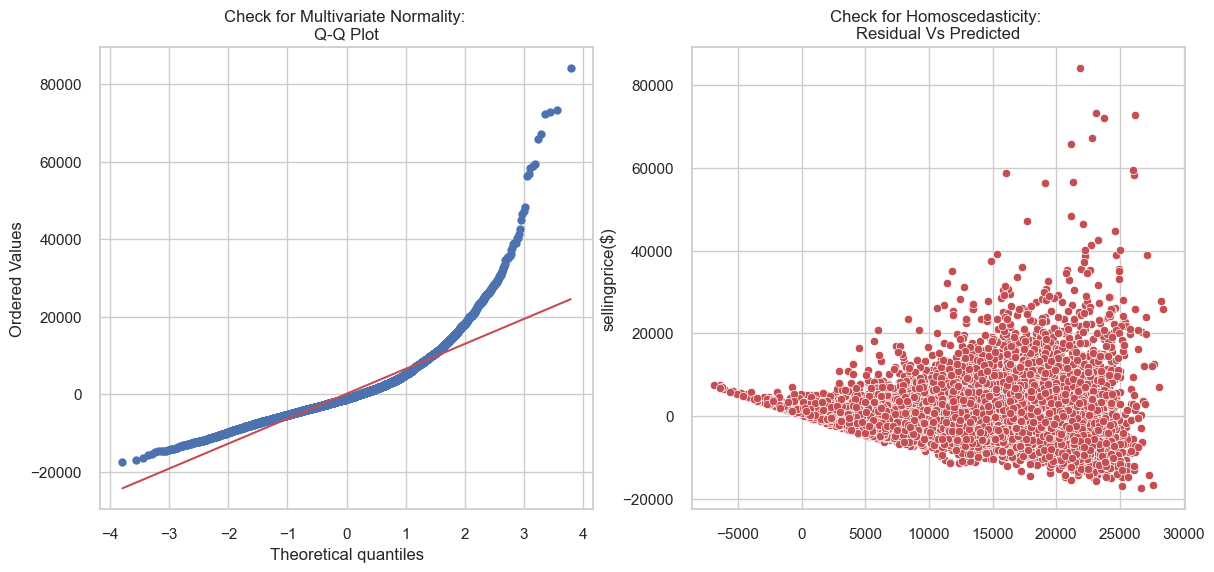

In [52]:
# Check for Multivariate Normality
# Quantile-Quantile plot
f,ax = plt.subplots(1,2,figsize=(14,6))
import scipy as sp
_,(_,_,r)= sp.stats.probplot((y_test - y_pred), fit=True, plot=ax[0])
ax[0].set_title('Check for Multivariate Normality: \nQ-Q Plot')

#Check for Homoscedasticity
sns.scatterplot(x=y_pred, y=(y_test - y_pred), ax=ax[1], color='r') 
ax[1].set_title('Check for Homoscedasticity: \nResidual Vs Predicted');

## Conclusion and Recommendations

Comment on the model accuracy, and thoroughly explain its value, as well as your findings from the model evaluation. State the problems (if any) and suggest possible solutions. Would you recommend this model for a used cars dealership that wants to get reliable estimates for used car prices?

**Answer**: the  linear regression model explains about 47.1% of the variability in used car prices based on the features and data you've used. The model is able to capture a significant portion of the variation in used car prices, however this means that more than half of the price variability is not explained by the model. It indicates that there are other factors contributing to car prices that the model doesn't consider. 
Some possible solutions would be different feature selection. Outlier detection: identify and handle outliers that might be affecting the model's accuracy. I would not recommend this as a final model rather I would recommend further model refinement and exploration of more advanced modeling techniques. While the linear regression model provides some insights, it may not yet be considered reliable for making used car price estimates in a competitive market.